# pandas Input Demo

This notebook describes how to read data into pandas from various sources

## standard imports

In [1]:
import pandas as pd
%matplotlib inline

## read_csv()
Read CSV files. The delimiters and escaped characters can be tweaked as needed. There is a huge number of options for this function.

In [2]:
df_csv = pd.read_csv('../DATA/airport_boardings.csv', thousands=',', index_col=1)
df_csv.head()

,Airport,2001 Rank,2001 Total,2010 Rank,2010 Total,2011 Rank,Total,Percent change 2001-2011,Percent change 2010-2011
Code,,,,,,,,,
ATL,"Atlanta, GA (Hartsfield-Jackson Atlanta Intern...",1,36384264,1,42655392,1,33034788,-9.2,-22.6
ORD,"Chicago, IL (Chicago O'Hare International)",2,28626694,2,30033313,2,22367052,-21.9,-25.5
DFW,"Dallas, TX (Dallas/Fort Worth International)",3,25198256,3,26785739,3,20430281,-18.9,-23.7
DEN,"Denver, CO (Denver International)",6,16397390,4,24965553,4,19190341,17.0,-23.1
LAX,"Los Angeles, CA (Los Angeles International)",4,22873307,5,22860849,5,18379418,-19.6,-19.6


## read_table()
Read text files (other than CSV). This function is very similar to *read_csv()* and shares most of its options. This is the best choice for tab-delimited, space-delimited, and other delimited flat file formats. 

In [3]:
df_table = pd.read_table('../DATA/columns_of_numbers.txt', delim_whitespace=True)
# df_table.set_index = pd.date_range('1/1/2017', periods=len(df_table), freq='D')
df_table.head()

,Alpha,Beta,Gamma,Delta,Epsilon,Zeta
0,63,51,59,61,50,4
1,40,66,9,64,63,17
2,18,23,2,61,1,9
3,29,8,40,59,10,26
4,54,9,68,4,16,21


<AxesSubplot:>

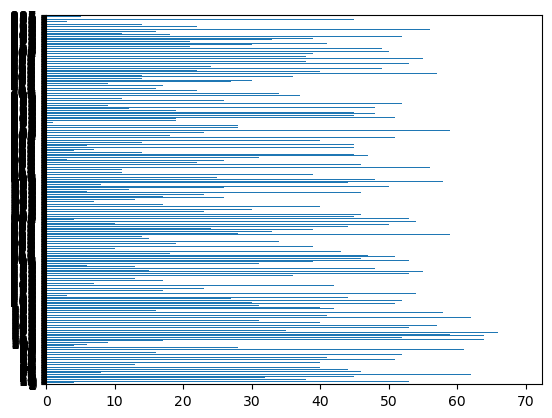

In [4]:
df_table['Delta'].plot(kind='barh')

<AxesSubplot:xlabel='Alpha', ylabel='Zeta'>

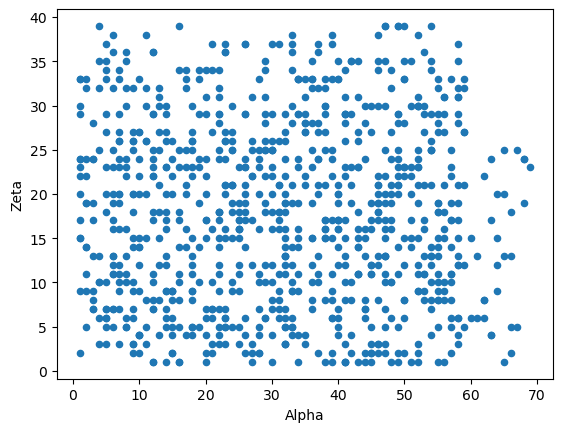

In [5]:
df_table.plot(kind='scatter', x='Alpha', y='Zeta')

## read_sql(), read_sql_query(), read_sql_table()
Read data from a SQL database. It requires a connection object from one of the Python modules that follows the DB API, or it can use a SQLAlchemy DB engine object. A dataframe is created from the rows in the result set. 

TODO: describe read_sql_table  read_sql_query

### read_sql()
read_sql() is a convenience function that delegates to either *read_sql_query()* or *read_sql_table()*, as appropriate. 
It takes a query (or a table name) and the database connection. If a table is specified, the connection must be a SQLAlchemy engine. If a query is specified, it can be either a SQLAlchemy engine or a DB API connection object, as from pymssql, pyodbc, pymysql, cx_oracle, psycopg, etc. 

In [6]:
# import sqlite3
# import pyodbc
# conn = pyodbc.connect('DSN...')
# conn = sqlite3.connect('../DATA/presidents.db')
import psycopg2
conn = psycopg2.connect(host='localhost', user='postgres', password='scripts')  
df_sql = pd.read_sql('select * from presidents', conn)
df_sql.head()

ModuleNotFoundError: No module named 'psycopg2'

### read_sql_query()
read_sql_query() populates a dataframe from a SQL query. Either a DB API connection or a SQLAlchemy engine may be specified. 

In [ ]:
df_sql = pd.read_sql_query('select * from presidents', conn)
df_sql.head()

### read_sql_table()
read_sql_table() populates a dataframe with an entire SQL table. The connection must be a SQLAlchemy engine. 

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///../DATA/presidents.db')
df_sql = pd.read_sql_table('presidents', engine)
df_sql.head()

## read_excel()
Read data from an Excel spreadsheet. The spreadsheet may be on the local computer, or specified via a URL. 

<!-- TODO: use different spreadsheet for local -->

### Local file

In [ ]:
df_excel_local = pd.read_excel('../DATA/presidents.xlsx')
df_excel_local.head()

### URL

In [ ]:
df_excel_url = pd.read_excel('http://qrc.depaul.edu/Excel_Files/Presidents.xls',
        na_values="NA()")
df_excel_url.head()

## read_html()
Read data from one or more tables in a Web page. It returns a list of DataFrames, even if there is only one table in the page. 

In [ ]:
df_list = pd.read_html('http://money.cnn.com/data/us_markets/', header=0)
print(len(df_list))
for df in df_list:
    print(df.head())
    print('*' * 60)
    
gain_lose = df_list[0]
print(gain_lose.loc[:,['Gainers & Losers', 'Price']])
gain_lose['Price'].plot()

## read_fwf()
This function reads files with fixed-width fields. If the fields you want are contiguous, specify the widths of all columns with the *widths* parameter. If they are non-contiguous (you just want to pull out certain columns), specify the columns with the *colspecs* parameter, which takes a list of tuples describing the beginning and end end of each desired column. If neither *widths* or *colspecs* is given, *read_fwf()* tries to infer the columns. 

In [ ]:
df_fwf = pd.read_fwf('../DATA/world_median_ages.txt', 
    names=['country', 'median_age'], widths=[7,50,4], index_col=0)
print(df_fwf.head())
print(df_fwf.iloc[1])

In [ ]:
ax = df_fwf.iloc[:20].plot(kind='barh', x='country', y='median_age')
print(type(ax))
ax.set_ylabel('Median Age')
